# Analyse

In [205]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [220]:
#data = pd.read_csv("results/error_04-12-24:20:15:47.csv", index_col=0)
data = pd.read_csv("results/f1-r@k_04-12-24:20:15:47.csv", index_col=0)
#data = pd.read_csv("results/times-05-12-24:13:27:39.csv", index_col=0)
data['Initial Sample'] = data['Initial Sample'].astype(str)
#data['index'] = data['count'].astype(str)


In [208]:
data.head()

,Runs,Initial Sample,Query Sample,Pair,Error on materialized,Error on lattice,Prediction
0,0,0.1,0.1,"('F9', 'B6')",0.166667,0.285714,0.0
1,0,0.1,0.1,"('F9', 'DL')",0.142857,0.333333,0.0
2,0,0.1,0.1,"('F9', 'WN')",0.250000,0.333333,0.0
3,0,0.1,0.1,"('B6', 'US')",0.142857,0.250000,0.0
4,0,0.1,0.1,"('B6', 'MQ')",0.571429,0.714286,0.0


In [90]:
pivot = pd.pivot_table(data, values="F1 on Queries", index='Initial Sample', columns=['Query Sample'], aggfunc="mean")
#pivot = pd.pivot_table(data, values="F1 on Queries", index='Initial Sample', columns=['Query Sample'], aggfunc="mean")
pivot

Query Sample,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Initial Sample,,,,,,,,,,
0.1,0.997765,0.996648,0.997753,1.000000,0.995518,0.997765,0.997753,0.997765,0.997765,1.000000
0.2,0.996648,0.997753,0.997765,0.996648,0.997765,0.997765,0.998883,1.000000,0.998883,0.998883
0.3,1.000000,0.998883,1.000000,0.998883,0.998883,1.000000,1.000000,0.998883,0.998883,1.000000
0.4,1.000000,0.998883,1.000000,1.000000,1.000000,1.000000,0.998883,1.000000,1.000000,1.000000
0.5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Query Sample', ylabel='Initial Sample'>

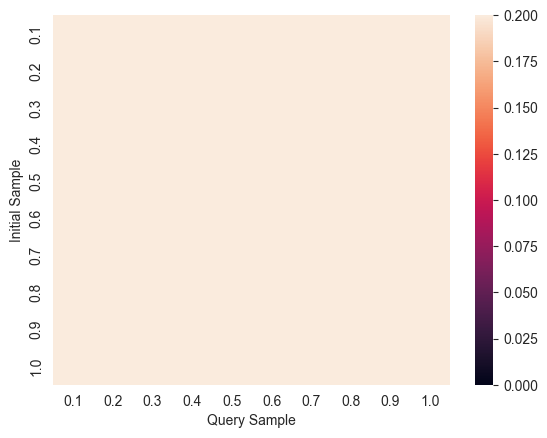

In [91]:
sns.heatmap(pivot, vmin=0, vmax=0.2)

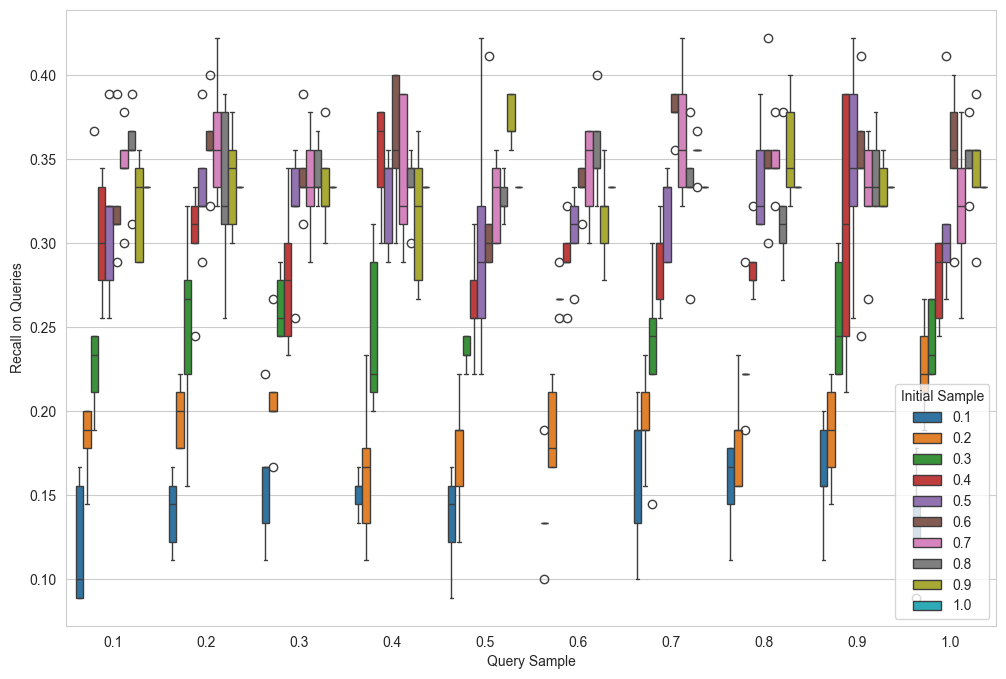

In [223]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
#x="count"
#y="Time"
#hue="Index"
x= "Query Sample"
#y = "Error on materialized"
#y = "F1 on Lattice"
y= "Recall on Queries"
#y="Prediction"
hue="Initial Sample"
#plot=sns.lineplot(ax=ax,data=data,x=x,y=y,hue=hue,)
plot=sns.boxplot(ax=ax,data=data, x=x, y=y, hue=hue,)

In [218]:
save=plot.get_figure()
name="figures/withoutTies/test_"+y+"_"+x+"_"+hue+".png"
#name="figures/test_"+y+"_"+x+"_"+hue+".png"
save.savefig(name)